In [6]:
#refs:
#http://stackoverflow.com/questions/7718034/maximum-likelihood-estimate-pseudocode
#http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#Generate fake data set (Gaussian centered at zero)
np.random.seed(123) #for reproducibility
data = np.random.randn(100)

#Parameters for the MCMC-MH method
prop_width=0.05 #width (sigma) of proposed step from current step
chain=[1.]     #starting value of chain
rejected=0     #track number of rejected proposals to compute rejection rate

#Build the chain
while len(chain)<10000:
    prop=norm(chain[-1],prop_width).rvs() #propose step
    
    pprop=norm(prop,1).pdf(data).prod()      #posterior for proposal
    pcurr=norm(chain[-1],1).pdf(data).prod() #current posterior
    
    acceptance=pprop/pcurr  #ratio of posteriors
    accept= np.random.rand() < acceptance #acceptance
    if accept:
        chain.append(prop) #add accepted proposal to chain
    else:
        rejected+=1
        chain.append(chain[-1]) #note: still always store a value!
    
print("rejection rate:%.2f"%(rejected/len(chain)))



rejection rate:0.16


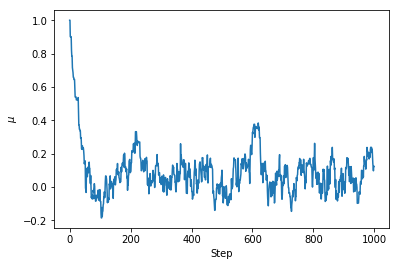

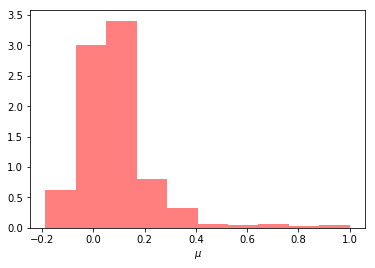

In [21]:
#plotting
burnin=0
maxSteps = 1000

plt.plot(chain[burnin:maxSteps])
plt.xlabel('Step')
plt.ylabel('$\mu$')
plt.show()

plt.hist(chain[burnin:maxSteps], normed=1, alpha=0.5, color="red")
plt.xlabel('$\mu$')
plt.show()